In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [432]:
# Read Apple
AAPL_5M = pd.read_csv('output/5m/AAPL.csv')
AAPL_15M = pd.read_csv('output/15m/AAPL.csv')
AAPL_1D = pd.read_csv('output/1d/AAPL.csv')

# # Read Amazon
# AMZN_5M = pd.read_csv('output/5m/AMZN.csv')
# AMZN_15M = pd.read_csv('output/15m/AMZN.csv')
# AMZN_1D = pd.read_csv('output/1d/AMZN.csv')

# # Read PLTR
# PLTR_5M = pd.read_csv('output/5m/PLTR.csv')
# PLTR_15M = pd.read_csv('output/15m/PLTR.csv')
# PLTR_1D = pd.read_csv('output/1d/PLTR.csv')

# # Read VVV
VVV_5M = pd.read_csv('output/5m/VVV.csv')
VVV_15M = pd.read_csv('output/15m/VVV.csv')
VVV_1D = pd.read_csv('output/1d/VVV.csv')

In [433]:
# PLTR_1D.describe(include='all')

In [434]:
# PLTR_1D.loc[PLTR_1D['change_pct'].idxmax()]

In [435]:
# profits = np.cumsum(PLTR_1D['change_pct'])
# plt.plot(PLTR_1D['Close'], color='blue', label='Close price')
# plt.plot(profits, color='red', label='Accumulated profit in %')
# plt.legend()
# plt.show()

In [436]:
def plot_buy_sell_signals(data, title: str):
    plt.figure(figsize=(18,4))
    plt.plot(data['Close'], color='blue', label='Close price', zorder=1)
    sell = data.loc[data['action'] == 'sell']
    buy = data.loc[data['action'] == 'buy']

    sells = len(sell)
    buys = len(buy)
    holds = len(data) - sells - buys

    print(f'Total buys: {buys}')
    print(f'Total holds: {holds}')
    print(f'Total sales: {sells}')

    plt.title(title)
    plt.scatter(buy.index, buy['Close'], color='g', label='Buy', marker='^', zorder=2)
    plt.scatter(sell.index, sell['Close'], color='r', label='Sell', marker='v', zorder=2)
    plt.legend()
    plt.show()


In [437]:
def plot_buy_sell_actions(data, title: str):
    plt.figure(figsize=(18,4))
    plt.plot(data['Close'], color='blue', label='Close price', zorder=1)
    sell = data.loc[(data['action'] == 'sell') & (data['change_pct'] != 0)]
    buy = data.loc[(data['action'] == 'buy') & (data['change_pct'] != 0)]

    sells = len(sell)
    buys = len(buy)
    holds = len(data) - sells - buys

    print(f'Total buys: {buys}')
    print(f'Total holds: {holds}')
    print(f'Total sales: {sells}')

    plt.title(title)
    plt.scatter(buy.index, buy['Close'], color='g', label='Buy', marker='^', zorder=2)
    plt.scatter(sell.index, sell['Close'], color='r', label='Sell', marker='v', zorder=2)
    plt.legend()
    plt.show()

In [438]:
def plot_profits(data, title: str):
    plt.plot(data['profits'], color='orange', label='Profits over time')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

In [439]:
def plot_indicators(data, title: str):
    indicators = ['rsi', 'macd', 'obv', 'so']
    data_normalization = data[indicators]

    scaler = MinMaxScaler()
    normalized = scaler.fit_transform(data_normalization)

    normalized_df = pd.DataFrame(normalized, columns=indicators)

    plt.figure(figsize=(22,2))
    for column in normalized_df.columns:
        plt.plot(data['Datetime'], normalized_df[column], label=column)

    plt.xlabel("Time")
    plt.ylabel("Normalized")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.title(title)
    plt.gca().set_xlabel([])
    plt.show()

Total buys: 47
Total holds: 3228
Total sales: 46


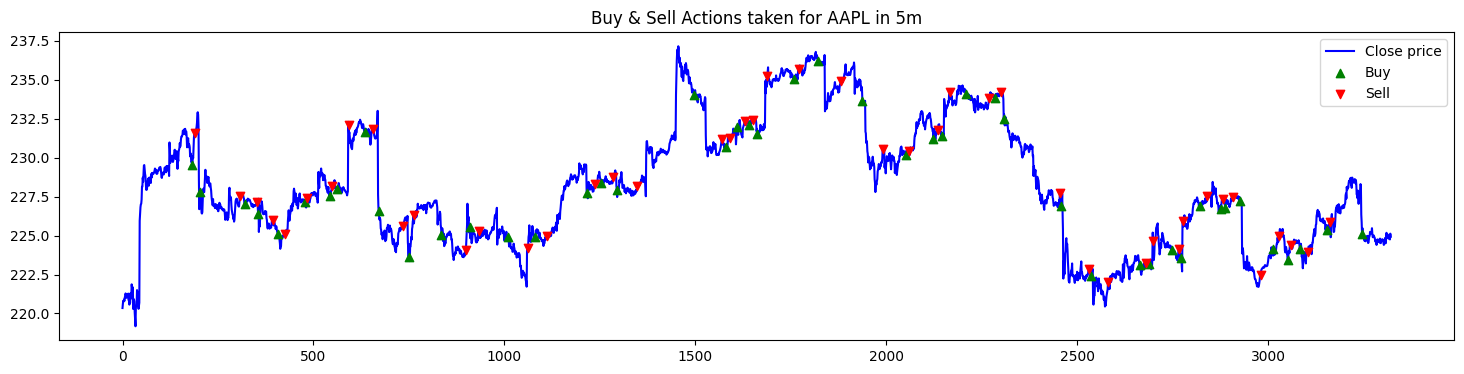

In [440]:
plot_buy_sell_actions(AAPL_5M, 'Buy & Sell Actions taken for AAPL in 5m')

Total buys: 564
Total holds: 2249
Total sales: 508


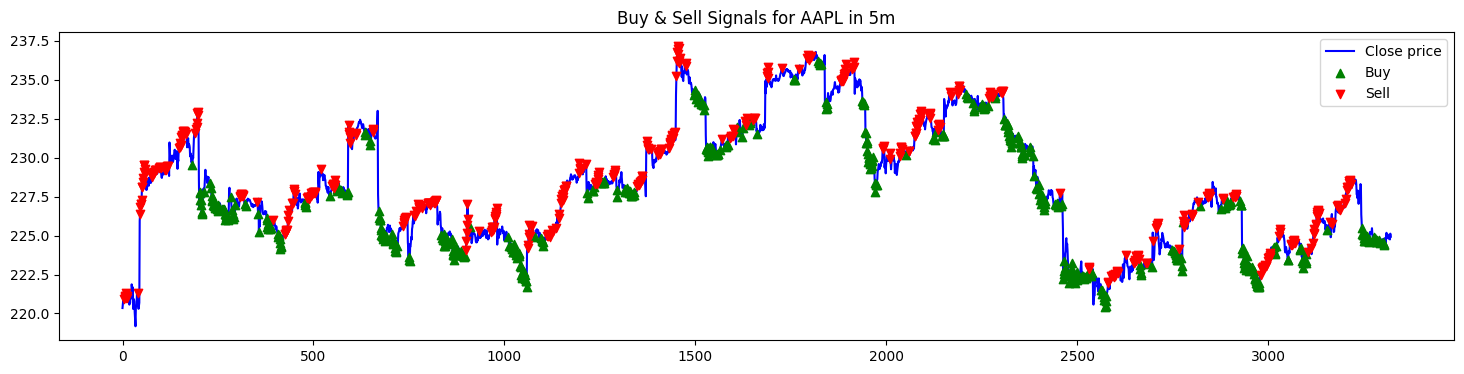

Total buys: 418
Total holds: 624
Total sales: 43


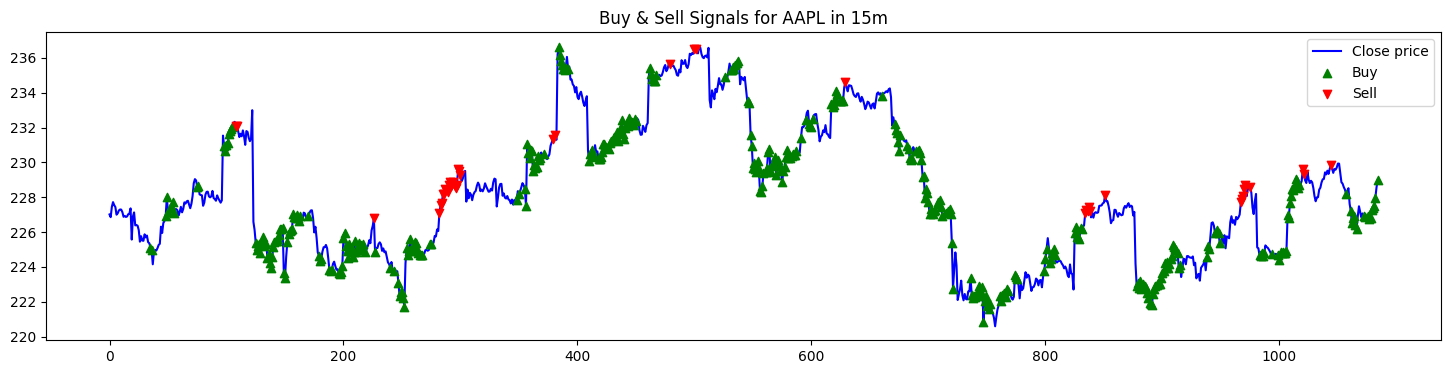

Total buys: 15
Total holds: 176
Total sales: 29


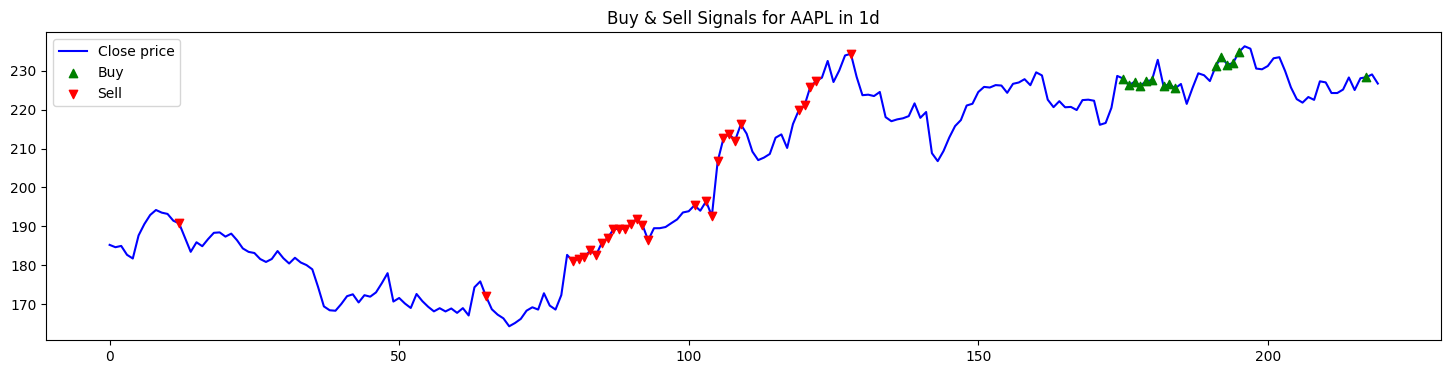

In [441]:
plot_buy_sell_signals(AAPL_5M, 'Buy & Sell Signals for AAPL in 5m')
plot_buy_sell_signals(AAPL_15M, 'Buy & Sell Signals for AAPL in 15m')
plot_buy_sell_signals(AAPL_1D, 'Buy & Sell Signals for AAPL in 1d')

In [442]:
# plot_buy_sell(AMZN_5M, 'Buy & Sell Signals for AMZN in 5m')
# plot_buy_sell(AMZN_15M, 'Buy & Sell Signals for AMZN in 15m')
# plot_buy_sell(AMZN_1D, 'Buy & Sell Signals for AMZN in 1d')

Total buys: 2421
Total holds: 418
Total sales: 335


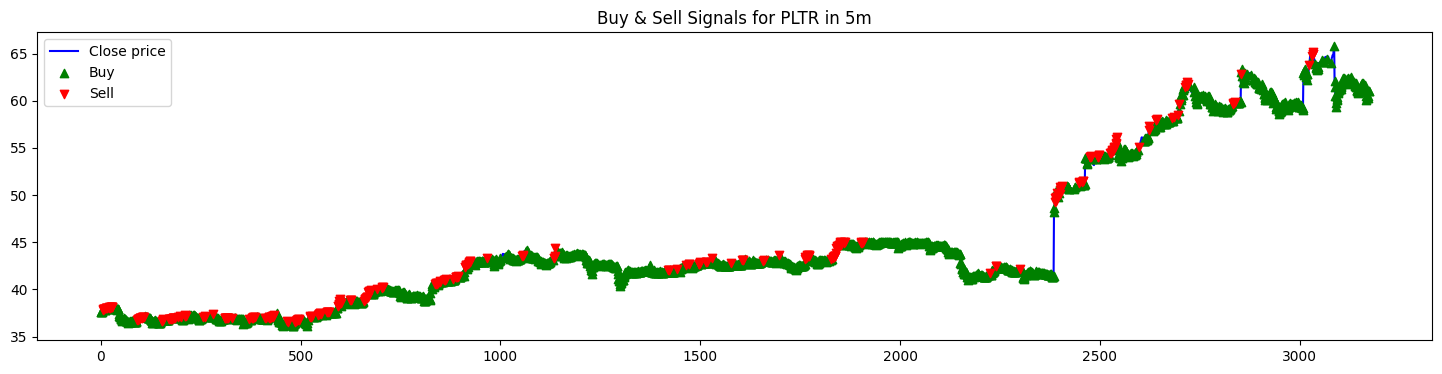

Total buys: 842
Total holds: 144
Total sales: 99


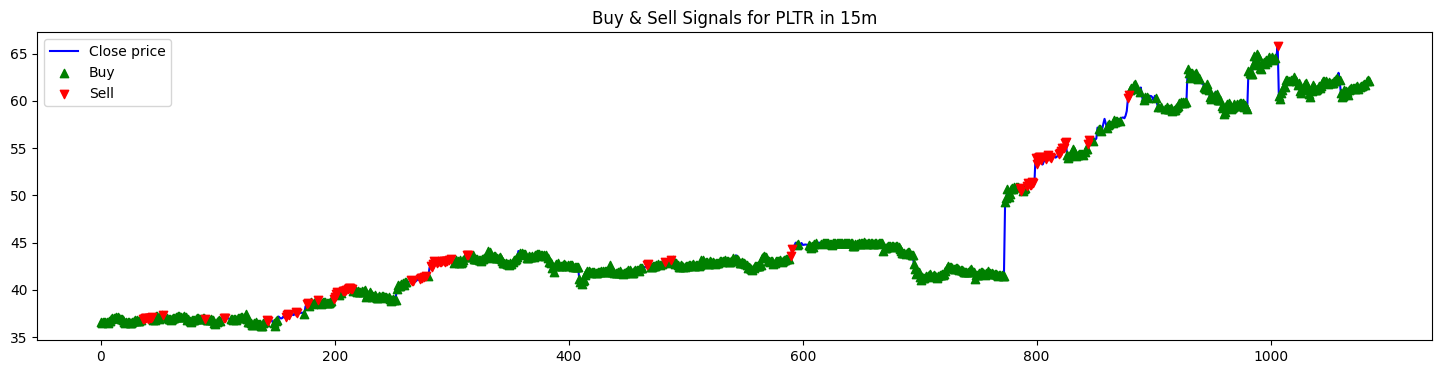

Total buys: 201
Total holds: 17
Total sales: 2


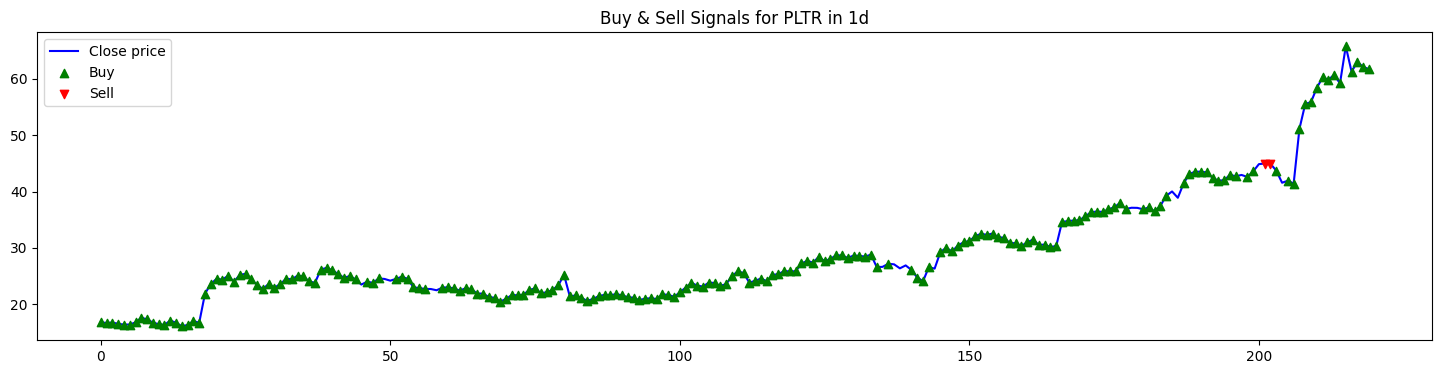

In [443]:
plot_buy_sell_signals(PLTR_5M, 'Buy & Sell Signals for PLTR in 5m')
plot_buy_sell_signals(PLTR_15M, 'Buy & Sell Signals for PLTR in 15m')
plot_buy_sell_signals(PLTR_1D, 'Buy & Sell Signals for PLTR in 1d')

Total buys: 1282
Total holds: 1765
Total sales: 219


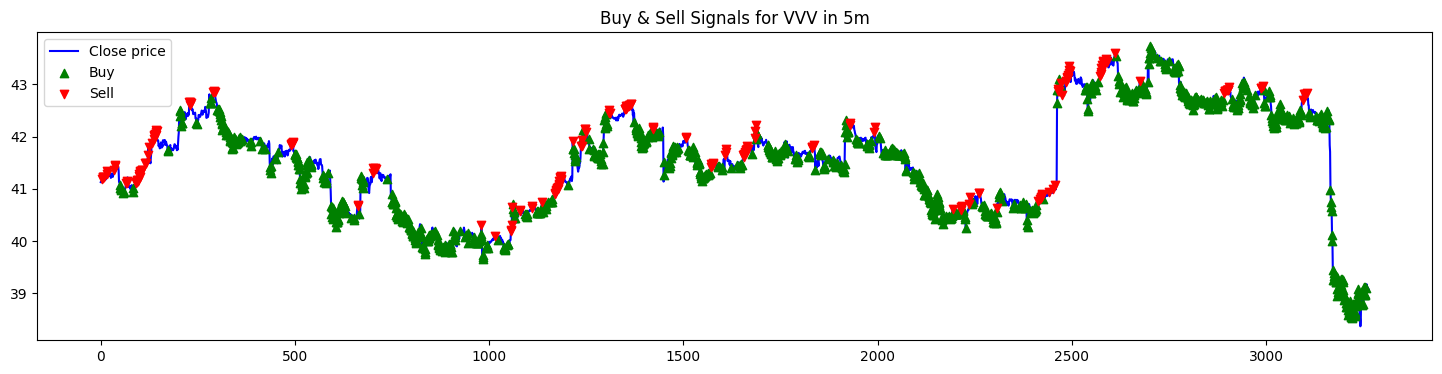

Total buys: 343
Total holds: 668
Total sales: 74


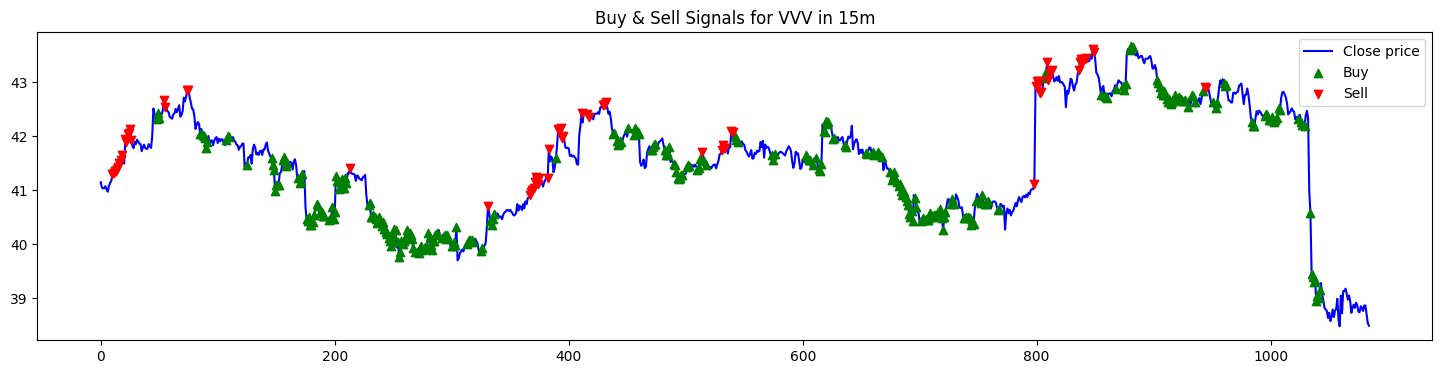

Total buys: 105
Total holds: 97
Total sales: 18


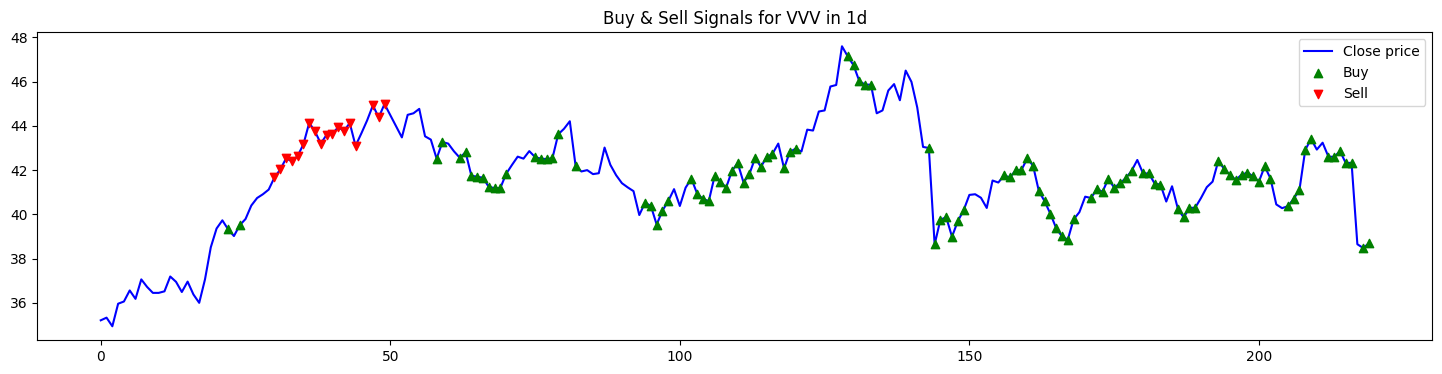

In [444]:
plot_buy_sell_signals(VVV_5M, 'Buy & Sell Signals for VVV in 5m')
plot_buy_sell_signals(VVV_15M, 'Buy & Sell Signals for VVV in 15m')
plot_buy_sell_signals(VVV_1D, 'Buy & Sell Signals for VVV in 1d')

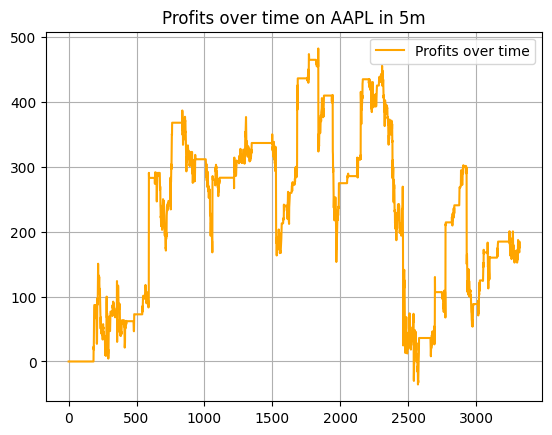

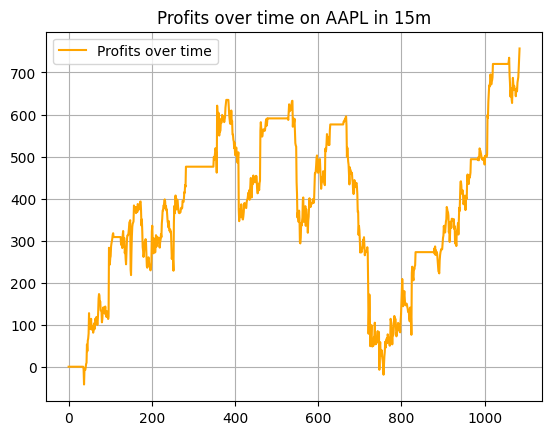

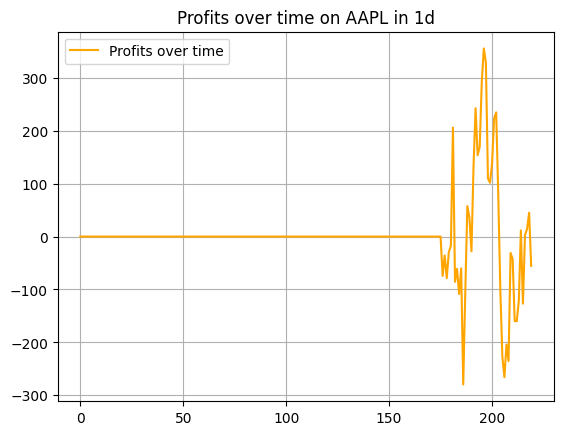

In [445]:
plot_profits(AAPL_5M, 'Profits over time on AAPL in 5m')
plot_profits(AAPL_15M, 'Profits over time on AAPL in 15m')
plot_profits(AAPL_1D, 'Profits over time on AAPL in 1d')

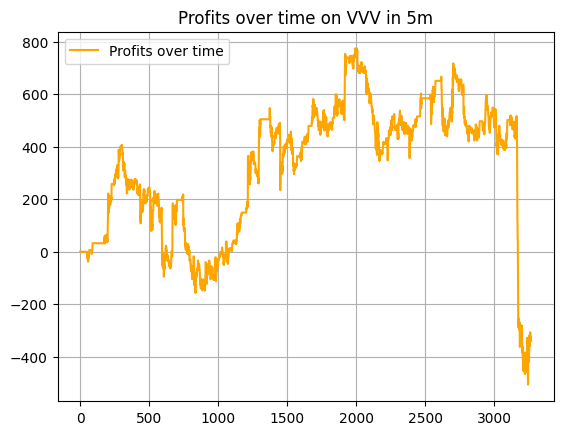

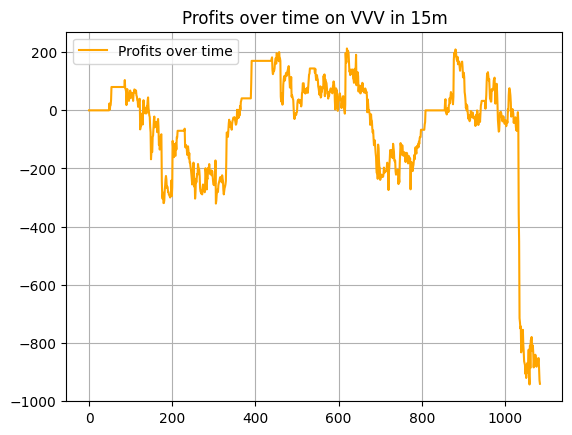

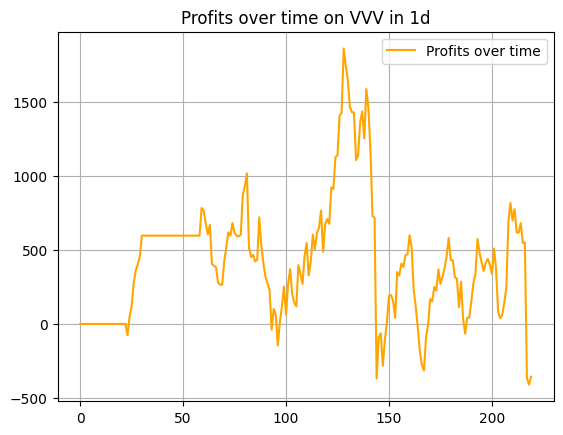

In [446]:
plot_profits(VVV_5M, 'Profits over time on VVV in 5m')
plot_profits(VVV_15M, 'Profits over time on VVV in 15m')
plot_profits(VVV_1D, 'Profits over time on VVV in 1d')

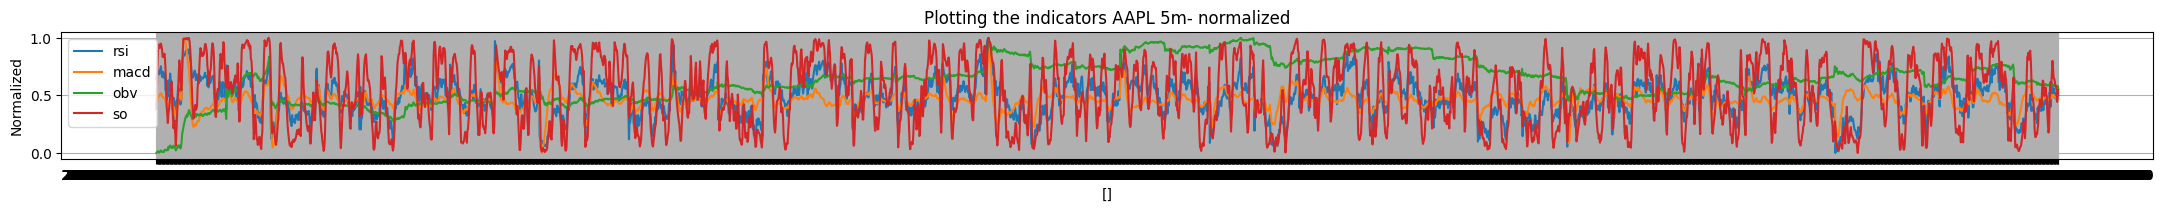

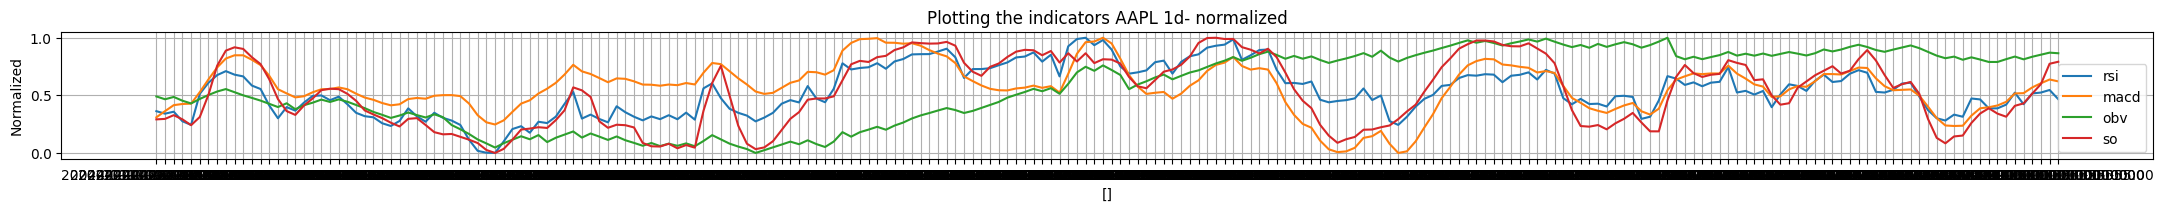

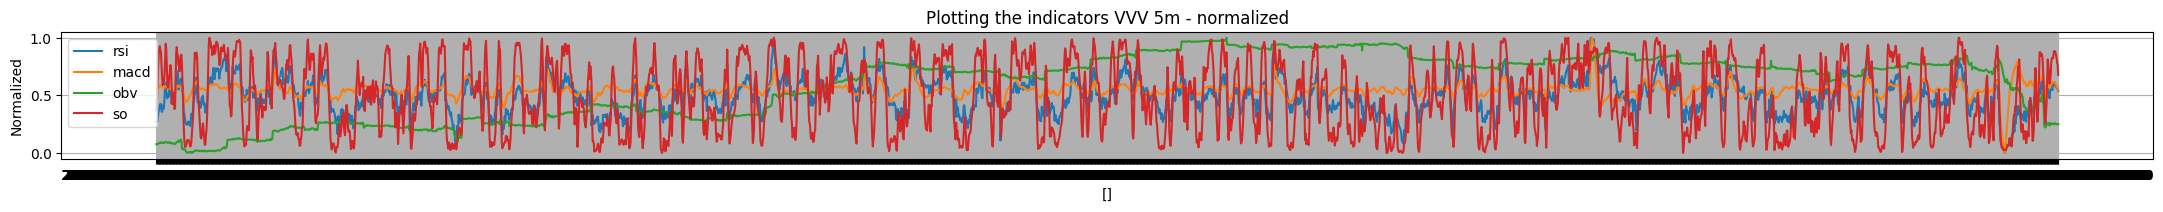

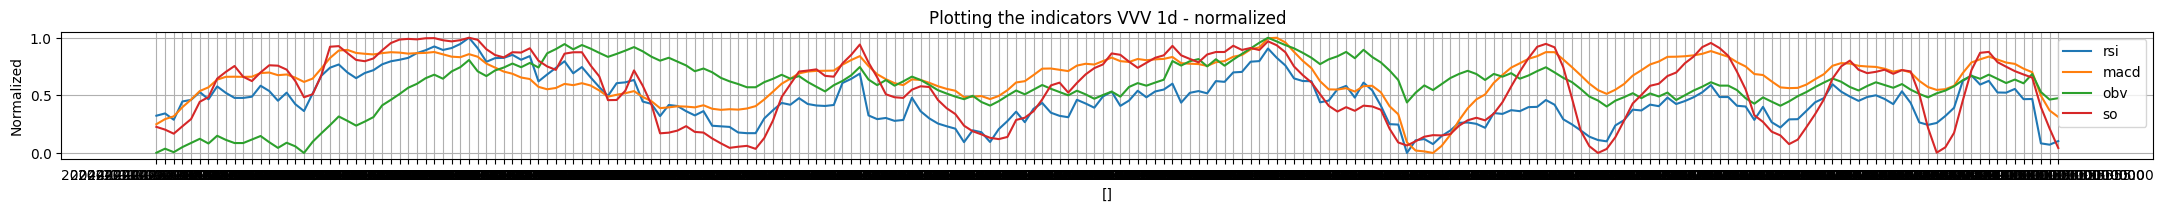

In [447]:
plot_indicators(AAPL_5M, 'Plotting the indicators AAPL 5m- normalized')
plot_indicators(AAPL_1D, 'Plotting the indicators AAPL 1d- normalized')

plot_indicators(VVV_5M, 'Plotting the indicators VVV 5m - normalized')
plot_indicators(VVV_1D, 'Plotting the indicators VVV 1d - normalized')